# Email Spam Classifier Using KNN Classification

### Importing Libraries

In [23]:
#importing libraries 
import pandas as pd 

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.tree import DecisionTreeClassifier, plot_tree



import warnings
warnings.filterwarnings("ignore")

### Loading the data

In [24]:
data = pd.read_csv('spam.csv', encoding='latin')
data.shape

(5572, 5)

In [25]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [26]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [28]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


#   Data Cleaning 

In [29]:
# Drop unnecessary columns
data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
# Update the colum names 
data.rename(columns={"v1":"type", "v2":"message"}, inplace=True)
data.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
# Change the datatype of variable type to be categorical

data["type"] = data["type"].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   type     5572 non-null   category
 1   message  5572 non-null   object  
dtypes: category(1), object(1)
memory usage: 49.2+ KB


#   Feature Engineering and Univariate Analysis

In [32]:
# From message, extract the length and create a new feature that contains the length of each message
data['message_length'] = data['message'].apply(len)
data.head()

,type,message,message_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: title={'center': 'MESSAGE LENTH DISTRIBUTION'}, ylabel='Frequency'>

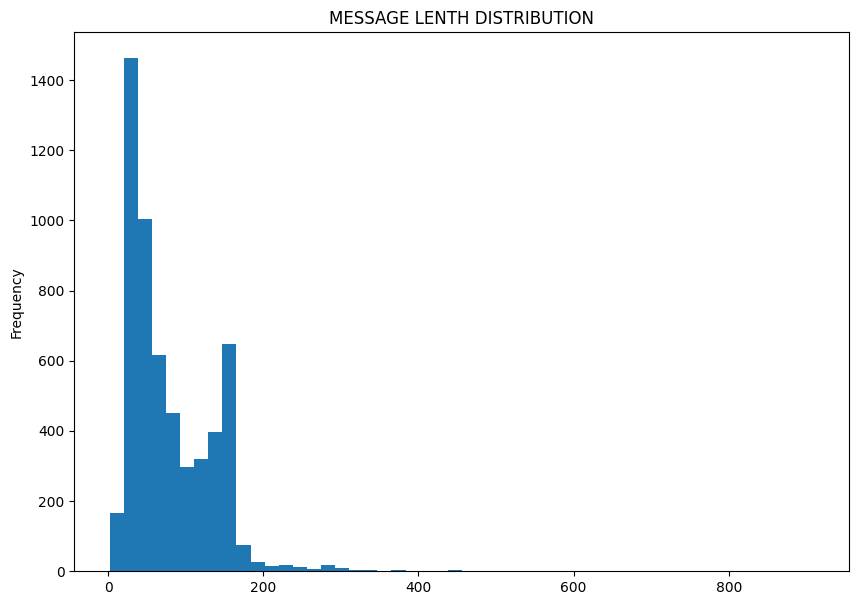

In [33]:
# Plot the frequency distribution for the message_length
plt.title("MESSAGE LENTH DISTRIBUTION")
data["message_length"].plot(bins=50, kind='hist', figsize=(10,7))

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

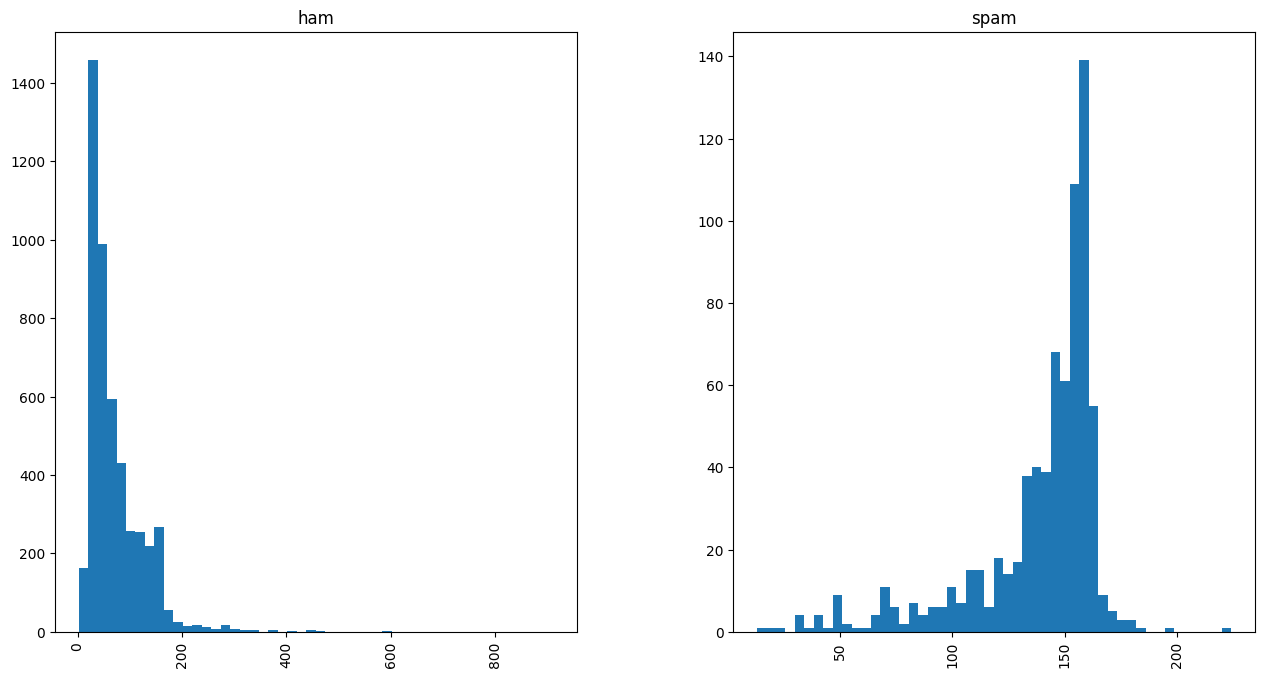

In [34]:
# Plot the frequency distribution based on the label
data.hist(column='message_length', by='type', bins=50, figsize=(15,8))

In [35]:
#create an instance of label encoder
encoder = LabelEncoder()

#label encode the variable type [0, 1]
data["type"] = encoder.fit_transform(data["type"])  

data.head()

,type,message,message_length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


# Creating Training and Test set

In [36]:
# Vectorize the variable message that will be used as x
count = CountVectorizer()
input = ['REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode']

x = count.fit_transform(data['message'])
y = data["type"]

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.20, random_state=52)

x

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [37]:
# Shape of train data
(x_train.shape), (y_train.shape)

((4457, 8672), (4457,))

In [38]:
# Shape of test data
(x_test.shape), (y_test.shape)

((1115, 8672), (1115,))

## Creating and Training the model

In [39]:


# Creating an instance of Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=99)

# Fitting the model
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=99)

In [40]:
# Make predictions on the test set
prediction = model.predict(x_test)

prediction

array([0, 0, 0, ..., 0, 0, 0])

## Evaluating the model

In [41]:
print("ACCURACY SCORE : {}". format(accuracy_score(y_test, prediction)) )
print("PRECISION SCORE : {}". format(precision_score(y_test, prediction)) )


ACCURACY SCORE : 0.9668161434977578
PRECISION SCORE : 0.8913043478260869


##  Summary 
    Looking at the above accuracy abd precision score, we can say that our has performed much better.

##  Visualize the Tree

In [42]:
#create a new model with short depth to be visualized
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=99)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=99)

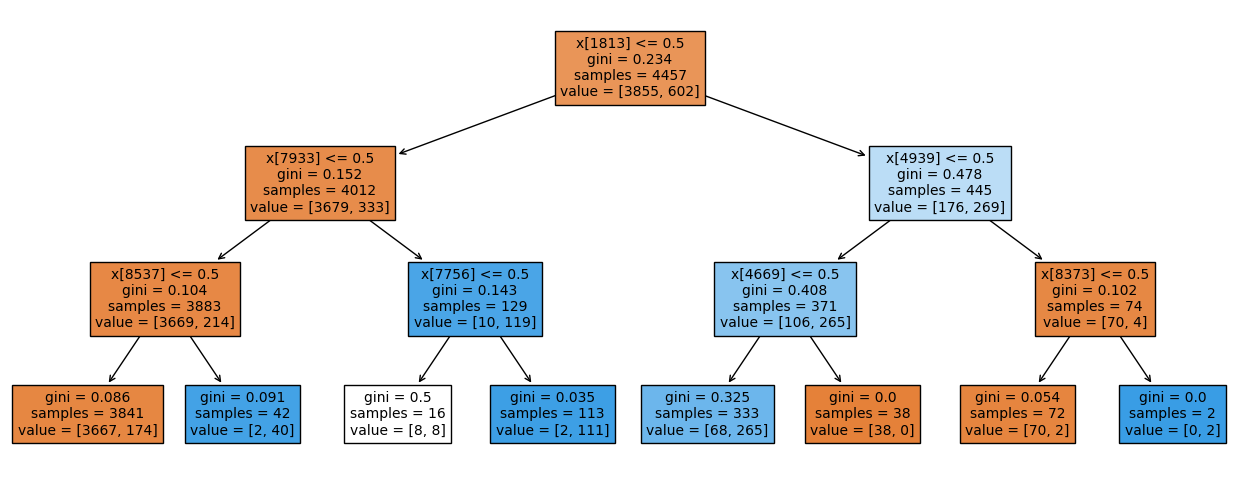

In [43]:
#display the model tree
plt.figure("DECISION TREE", figsize=[16, 6])
plot_tree(decision_tree, fontsize=10, filled=True)
plt.show()